In [168]:
import numpy as np
from PIL import Image, ImageFilter, ImageDraw 
import matplotlib.pyplot as plt
import time 

In [169]:
def change_brightness(image, brightness):
    # Đọc ảnh và chuyển đổi sang mảng numpy
    img_array = np.array(image)
    
    # Thay đổi độ sáng bằng cách cộng giá trị brightness vào mỗi pixel
    new_img_array = img_array + brightness
    
    # Giới hạn giá trị pixel trong khoảng từ 0 đến 255
    new_img_array = np.clip(new_img_array, 0, 255)
    
    # Chuyển đổi mảng numpy thành ảnh PIL
    new_image = Image.fromarray(np.uint8(new_img_array))
    
    return new_image


In [170]:
def change_contrast(image, contrast):
    # Đọc ảnh và chuyển đổi sang mảng numpy
    img_array = np.array(image)
    
    # Thay đổi độ tương phản bằng cách nhân giá trị contrast vào mỗi pixel
    new_img_array = img_array * contrast
    
    # Giới hạn giá trị pixel trong khoảng từ 0 đến 255
    new_img_array = np.clip(new_img_array, 0, 255)
    
    # Chuyển đổi mảng numpy thành ảnh PIL
    new_image = Image.fromarray(np.uint8(new_img_array))
    
    return new_image


In [171]:
def flip_image(image, mode):
    # Lật ảnh theo mode
    if mode == "horizontal":
        flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    elif mode == "vertical":
        flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)
    else:
        flipped_image = image
    
    return flipped_image

In [172]:
def convert_to_grayscale(image):
    # Chuyển đổi ảnh thành mảng NumPy
    image_array = np.array(image)

    # Chuyển đổi ảnh thành ảnh xám
    luminosity_constant = [0.21, 0.72, 0.07]
    grayscale_image = np.dot(image_array[..., :3], luminosity_constant).astype(np.uint8) 
    
    return Image.fromarray(grayscale_image)

In [173]:
def convert_to_sepia(image):
    # Chuyển đổi ảnh thành ảnh sepia
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia_image = np.dot(np.array(image), sepia_filter.T)
    sepia_image = np.clip(sepia_image, 0, 255)
    
    return sepia_image.astype(np.uint8)

In [174]:
def apply_blur(image, radius):
    # Áp dụng hiệu ứng làm mờ
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius))
    
    return blurred_image

def apply_sharpen(image, factor):
    # Áp dụng hiệu ứng làm sắc nét
    sharpened_image = image.filter(ImageFilter.UnsharpMask(factor))
    
    return sharpened_image


In [175]:
def crop_image(image, size):
    # Lấy kích thước ảnh
    width, height = image.size
    
    # Tính toán tọa độ cắt
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size
    
    # Cắt ảnh
    cropped_image = image.crop((left, top, right, bottom))
    
    return cropped_image


In [176]:
def circle_crop(image):
    # Tạo mask tròn
    mask = Image.new("L", image.size, 0)
    draw = ImageDraw.Draw(mask)
    width, height = image.size
    draw.ellipse((0, 0, width, height), fill=255)
    
    # Áp dụng mask lên ảnh
    masked_image = Image.composite(image, Image.new("RGB", image.size), mask)
    
    return masked_image


In [177]:
def ellipse_crop(image):
    # Tạo mask elip
    mask = Image.new("L", image.size, 0)
    draw = ImageDraw.Draw(mask)
    width, height = image.size
    draw.ellipse((0, 0, width, height), fill=255)
    draw.ellipse((width // 4, height // 4, width * 3 // 4, height * 3 // 4), fill=0)
    
    # Áp dụng mask lên ảnh
    masked_image = Image.composite(image, Image.new("RGB", image.size), mask)
    
    return masked_image

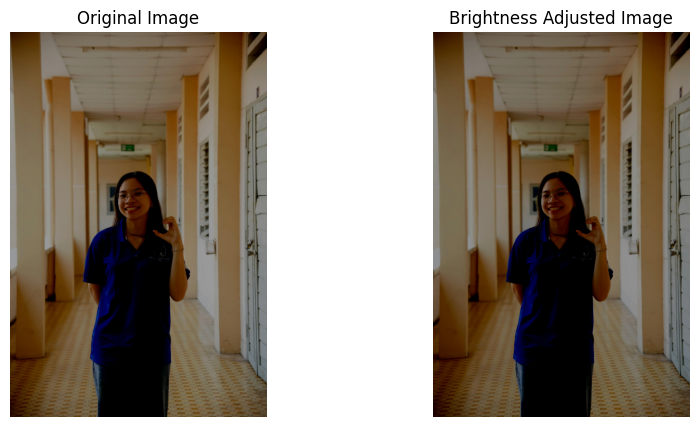

In [178]:
# Đọc ảnh
image = Image.open("D_PT.jpg")
# image = Image.open("BTT-4.jpg")


# Thay đổi độ sáng
brightened_image = change_brightness(image, -10)
# Thay đổi độ tương phản
contrasted_image = change_contrast(image, 1.5)
# Lật ảnh theo mode
flipped_image = flip_image(image, "vertical")
# Chuyển đổi thành ảnh xám
grayscale_image = convert_to_grayscale(image)
# Chuyển đổi thành ảnh sepia
sepia_image = convert_to_sepia(image)
# Áp dụng hiệu ứng làm mờ
blurred_image = apply_blur(image, 2)
# Áp dụng hiệu ứng làm sắc nét
sharpened_image = apply_sharpen(image, 4.0)
# Cắt ảnh
cropped_image = crop_image(image, 700)
# Cắt ảnh theo khung hình tròn
circle_cropped_image = circle_crop(image)
# Cắt nội dung ảnh theo khung hình elip
ellipse_cropped_image = ellipse_crop(image)


# Lưu ảnh đầu ra
brightened_image.save("output_brightened.jpg")
# Lưu ảnh đầu ra
contrasted_image.save("output_contrasted.jpg")
# Lưu ảnh đầu ra
flipped_image.save("output_flipped.jpg")
# Lưu ảnh xám đầu ra
grayscale_image.save("output_grayscale.jpg")
# Lưu ảnh sepia đầu ra
sepia_image = Image.fromarray(sepia_image)
sepia_image.save("output_sepia.jpg")
# Lưu ảnh đầu ra
blurred_image.save("output_blurred.jpg")
# Lưu ảnh đầu ra
sharpened_image.save("output_sharpened.jpg")
# Lưu ảnh đầu ra
cropped_image.save("output_cropped.jpg")
# Lưu ảnh đầu ra
circle_cropped_image.save("output_circle_cropped.jpg")
# Lưu ảnh đầu ra
ellipse_cropped_image.save("output_ellipse_cropped.jpg")



# Hiển thị ảnh gốc và ảnh sau khi giảm số lượng màu
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Brightness Adjusted Image")
axs[1].imshow(brightened_image)
axs[1].axis('off')
plt.show()

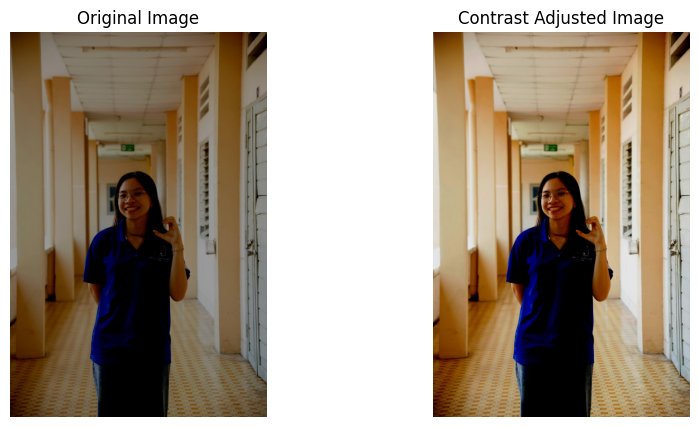

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Contrast Adjusted Image")
axs[1].imshow(contrasted_image)
axs[1].axis('off')
plt.show()

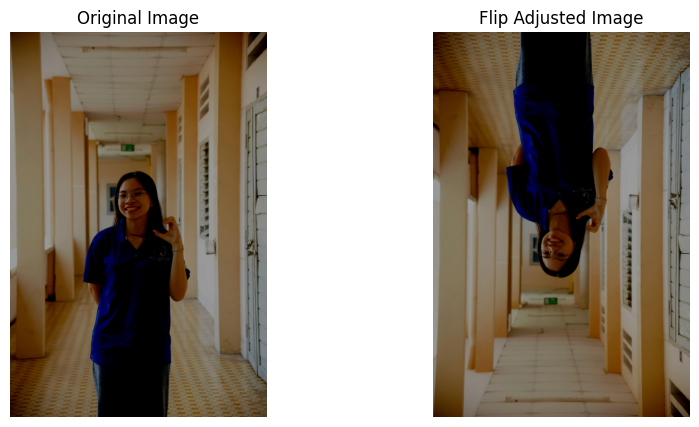

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Flip Adjusted Image")
axs[1].imshow(flipped_image)
axs[1].axis('off')
plt.show()

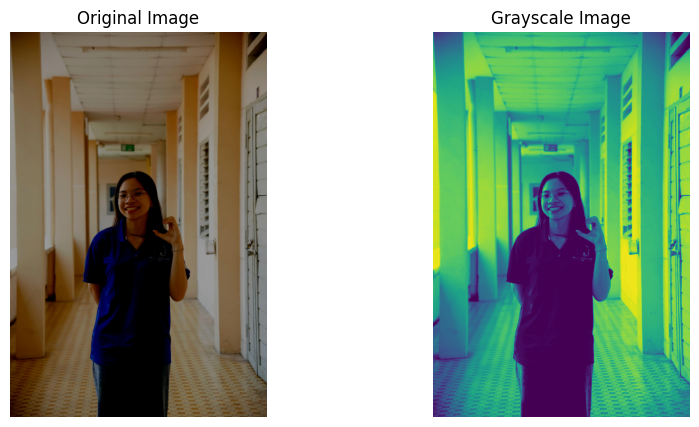

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Grayscale Image")
axs[1].imshow(grayscale_image)
axs[1].axis('off')
plt.show()

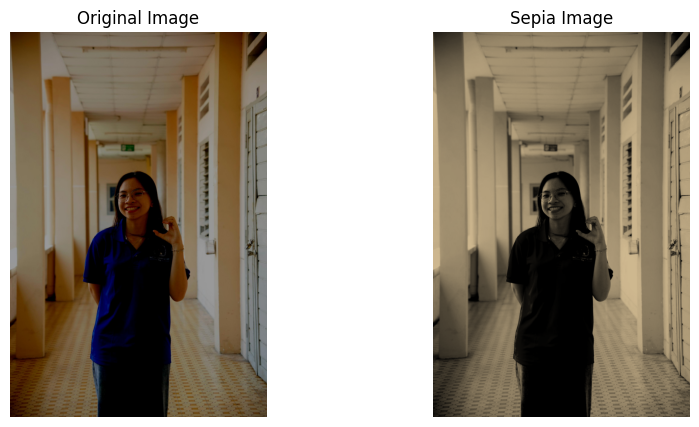

In [182]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Sepia Image")
axs[1].imshow(sepia_image)
axs[1].axis('off')
plt.show()

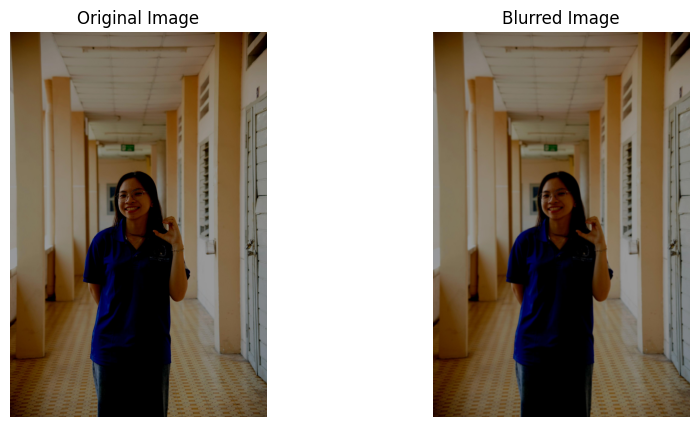

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Blurred Image")
axs[1].imshow(blurred_image)
axs[1].axis('off')
plt.show()

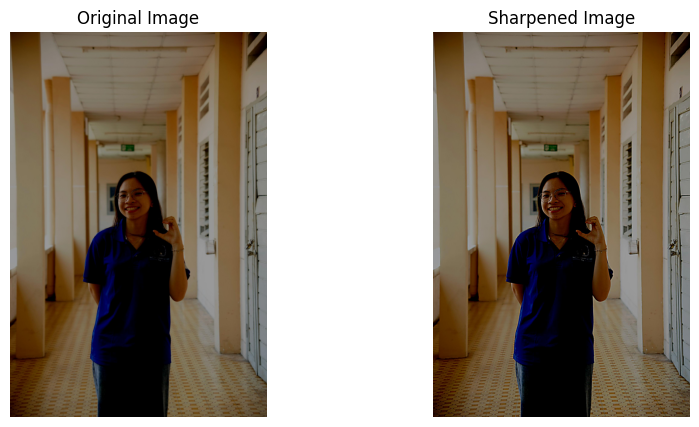

In [184]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Sharpened Image")
axs[1].imshow(sharpened_image)
axs[1].axis('off')
plt.show()

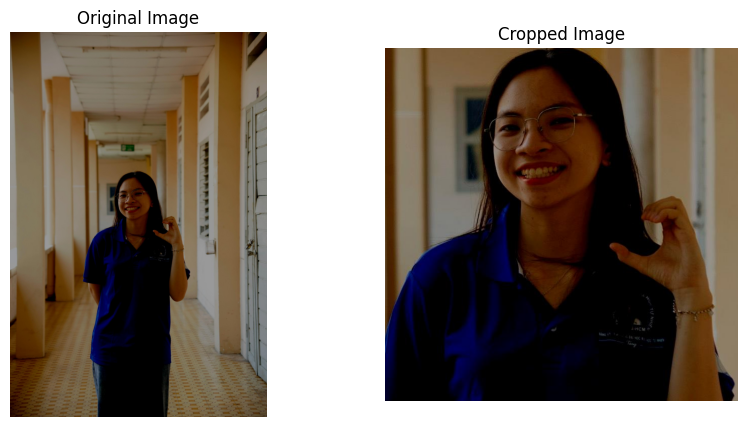

In [185]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Cropped Image")
axs[1].imshow(cropped_image)
axs[1].axis('off')
plt.show()

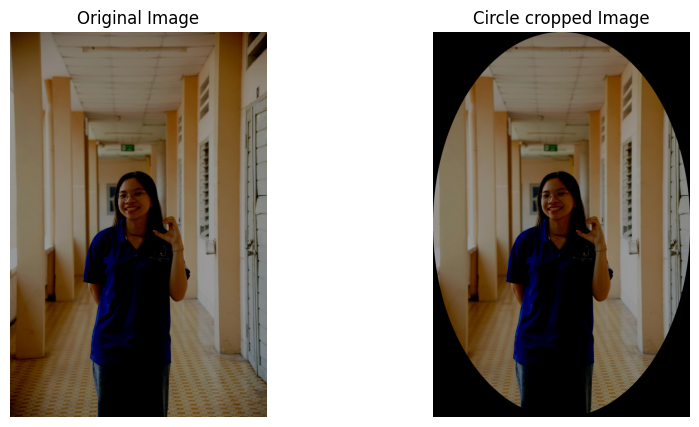

In [186]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Circle cropped Image")
axs[1].imshow(circle_cropped_image)
axs[1].axis('off')
plt.show()

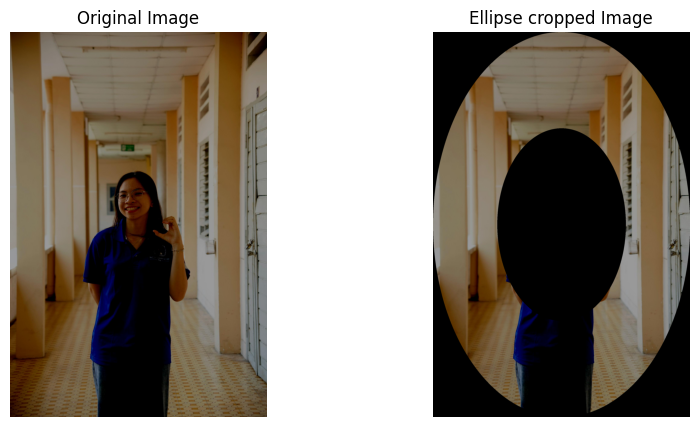

In [187]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Original Image")
axs[0].imshow(image)
axs[0].axis('off')
axs[1].set_title("Ellipse cropped Image")
axs[1].imshow(ellipse_cropped_image)
axs[1].axis('off')
plt.show()